<a href="https://colab.research.google.com/github/rjakkani1015/rashmi_INFO5731_-Fall2021/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [20]:
import pandas as pd
d = pd.read_csv("file1.csv")




In [7]:
!pip install stop_words

Data cleaning and Preprocessing


In [34]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')
pstem = PorterStemmer()

d['Lcase'] = d['500 abstracts'].apply(lambda i: " ".join(i.lower() for i in str(i).split()))
d['Tokenization'] = d['Lcase'].apply(lambda i: tokenizer.tokenize(i))
d['tok'] = d['Tokenization'].apply(lambda i: [a for a in i if not a in en_stop])
d['Stemm'] = d['tok'].apply(lambda i: [p_stemmer.stem(a) for a in i])
lists = []
for line in d['Stemm']:
  lists.append(line)

Bigrams and Trigrams


In [35]:
from gensim import corpora, models
Bi_grams = models.Phrases(lists, min_count=5, threshold=100)
Tri_grams = models.Phrases(Bi_grams[lists], threshold=100)
Bi_gramsmodel = models.phrases.Phraser(Bi_grams)
Tri_gramsmodel = models.phrases.Phraser(Tri_grams)
print(Tri_gramsmodel[Bi_gramsmodel[lists[0]]])


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['abstract', 'smart', 'health', 'can', 'defin', 'medic', 'public', 'health', 'practic', 'support', 'smart', 'mobil', 'devic', 'point', 'mhealth', 'u', 'health', 'can', 'made', 'use', 'smart', 'phone', 'connect', 'wireless', 'network', 'also', 'emergenc', 'technolog', 'shealth', 'can', 'give']


In [39]:
def mBi_grams(lists):
    return [Bi_gramsmodel[document] for document in lists]
def mTri_grams(lists):
    return [Tri_gramsmodel[Bi_gramsmodel[document]] for document in lists]
def lemmatization(lists, given=['NOUN', 'ADJ', 'VERB', 'ADV']):
    listsoutput = []
    for SA in lists:
        document = nlp(" ".join(SA)) 
        listsoutput.append([token.lemma_ for token in document if token.pos_ in given])
    return listsoutput

In [40]:
import spacy
Bi_gramsdata = mBi_grams(lists)
nlp = spacy.load('en', disable=['parser', 'ner'])
lemmatizeddata = lemmatization(Bi_gramsdata, given=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(lemmatizeddata[:1])


[['can', 'defin', 'medic', 'public', 'health', 'practic', 'support', 'health', 'can', 'made', 'use', 'smart', 'phone', 'connect', 'wireless', 'also', 'emergenc', 'technolog', 'shealth', 'can', 'give']]


Corpus


In [62]:
id2word = corpora.Dictionary(lemmatizeddata)
lists = lemmatizeddata
corpus = [id2word.doc2bow(list) for list in lists]
print(corpus[:1])
print(id2word[0])
[[(id2word[dip], freq) for dip, freq in cip] for cip in corpus[:1]]

[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]]
also


[[('also', 1),
  ('can', 3),
  ('connect', 1),
  ('defin', 1),
  ('emergenc', 1),
  ('give', 1),
  ('health', 2),
  ('made', 1),
  ('medic', 1),
  ('phone', 1),
  ('practic', 1),
  ('public', 1),
  ('shealth', 1),
  ('smart', 1),
  ('support', 1),
  ('technolog', 1),
  ('use', 1),
  ('wireless', 1)]]

LDA 



In [70]:
ldamodel = models.ldamodel.LdaModel(corpus=corpus, id2word = id2word, num_topics = 10, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto',  per_word_topics=True)
from pprint import pprint
pprint(ldamodel.print_topics())
documentlda = ldamodel[corpus]                                           
                                           
                                          

[(0,
  '0.030*"process" + 0.027*"structur" + 0.026*"system" + 0.024*"research" + '
  '0.020*"monitor" + 0.019*"smart" + 0.018*"use" + 0.018*"health" + '
  '0.017*"cost" + 0.016*"test"'),
 (1,
  '0.059*"system" + 0.055*"health" + 0.048*"care" + 0.037*"smart" + '
  '0.027*"present" + 0.027*"use" + 0.022*"paper" + 0.020*"inform" + '
  '0.019*"phone" + 0.019*"sensor"'),
 (2,
  '0.092*"monitor" + 0.082*"sensor" + 0.057*"health" + 0.039*"smart" + '
  '0.031*"develop" + 0.023*"system" + 0.021*"work" + 0.018*"use" + '
  '0.018*"wireless" + 0.018*"network"'),
 (3,
  '0.027*"health" + 0.026*"behavior" + 0.026*"can" + 0.023*"smart" + '
  '0.019*"inform" + 0.019*"platform" + 0.018*"technolog" + 0.018*"will" + '
  '0.016*"use" + 0.015*"student"'),
 (4,
  '0.039*"person" + 0.027*"user" + 0.026*"health" + 0.022*"access" + '
  '0.021*"smart" + 0.021*"peopl" + 0.020*"system" + 0.019*"problem" + '
  '0.018*"time" + 0.017*"base"'),
 (5,
  '0.067*"home" + 0.042*"smart" + 0.028*"find" + 0.024*"public" + 0.

LSA


In [72]:
lsa_model = models.LsiModel(corpus, num_topics = 10, id2word = id2word)
pprint(lsa_model.print_topics(num_topics = 10))

[(0,
  '-0.461*"health" + -0.410*"smart" + -0.375*"system" + -0.317*"monitor" + '
  '-0.247*"sensor" + -0.228*"use" + -0.159*"can" + -0.139*"care" + '
  '-0.128*"home" + -0.119*"develop"'),
 (1,
  '-0.561*"system" + 0.373*"monitor" + 0.335*"smart" + -0.322*"food" + '
  '0.197*"home" + -0.158*"develop" + -0.134*"can" + 0.106*"health" + '
  '-0.102*"care" + -0.101*"know"'),
 (2,
  '-0.462*"sensor" + 0.438*"card" + -0.419*"monitor" + 0.345*"smart" + '
  '0.230*"health" + 0.164*"care" + -0.155*"detect" + 0.131*"patient" + '
  '-0.118*"network" + -0.116*"develop"'),
 (3,
  '-0.654*"health" + 0.468*"smart" + -0.306*"care" + 0.291*"card" + '
  '0.211*"use" + 0.126*"sensor" + 0.090*"food" + -0.069*"o" + -0.069*"monitor" '
  '+ 0.066*"develop"'),
 (4,
  '-0.472*"use" + 0.466*"system" + -0.410*"can" + -0.237*"food" + 0.157*"home" '
  '+ 0.150*"monitor" + 0.103*"card" + -0.092*"phone" + -0.086*"also" + '
  '-0.086*"health"'),
 (5,
  '-0.486*"sensor" + 0.414*"monitor" + 0.372*"food" + -0.219*"care

In [75]:
from gensim.models import CoherenceModel
print('Perplexity: ', ldamodel.log_perplexity(corpus))
coherencemodel_lda = CoherenceModel(model=ldamodel, texts=lemmatizeddata, dictionary=id2word, coherence='c_v')
coherence = coherencemodel_lda.get_coherence()
print('Coherence Score: ', coherence)

Perplexity:  -7.002350223892332
Coherence Score:  0.3564533454298614


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

Positive    173
Negative    171
Neutral     154
Name: Sentiment, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


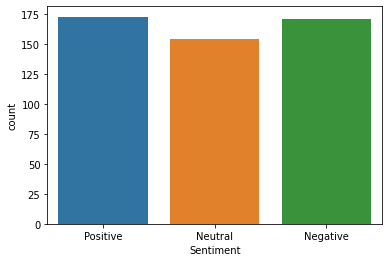

In [82]:
import seaborn as sns
print(d['Sentiment'].value_counts())
sns.countplot(d['Sentiment'])




In [85]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
from nltk.corpus import stopwords
from textblob import TextBlob
d['Cleandata'] = d['500 abstracts'].apply(lambda i: " ".join(i.lower() for i in i.split()))
d['Cleandata'] = d['Cleandata'].str.replace('[^\w\s]','')
st = stopwords.words('english')
d['Cleandata'] = d['Cleandata'].apply(lambda i: " ".join(i for i in i.split() if i not in st))

Feature selection


In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
Tf_idf = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
Tf_idf.fit(d['500 abstracts'])
values1 = Tf_idf.transform(d['500 abstracts'])
encoder = LabelEncoder()
values2 = encoder.fit_transform(d['Sentiment'])

I used the TF IDF vectorizer to improve the performance of the model. TF IDF is a simple algorithm and an efficient one. That returns the documents that are very relevant to the given queries and produce similar representations by reducing commputational complexity. Feature selection is used to reduce the number of input variables in the process of developing a predictive model. It also reduces the model overfitting and increases the precision of the model.

Splitting training and test data

In [89]:
from sklearn import model_selection
train1, test1, train2, test2 = model_selection.train_test_split(values1, values2, test_size=0.2)

Naive Bayes

In [104]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import naive_bayes
Naivebayes = naive_bayes.MultinomialNB()
Naivebayes.fit(train1, train2)
predicted = Naivebayes.predict(test1)
print("Accuracy score is {0}".format(accuracy_score(test2, predicted)))
result = classification_report(test2, predicted, output_dict=True)
print(result)

Accuracy score is 0.3
{'0': {'precision': 0.35714285714285715, 'recall': 0.25, 'f1-score': 0.2941176470588235, 'support': 40}, '1': {'precision': 0.26666666666666666, 'recall': 0.13793103448275862, 'f1-score': 0.18181818181818182, 'support': 29}, '2': {'precision': 0.2807017543859649, 'recall': 0.5161290322580645, 'f1-score': 0.3636363636363636, 'support': 31}, 'accuracy': 0.3, 'macro avg': {'precision': 0.3015037593984962, 'recall': 0.3013533555802744, 'f1-score': 0.2798573975044563, 'support': 100}, 'weighted avg': {'precision': 0.3072080200501253, 'recall': 0.3, 'f1-score': 0.2831016042780748, 'support': 100}}


SVM


In [159]:
from sklearn import svm
svm1 = svm.SVC(kernel='linear')
svm1.fit(train1, train2)
predict = svm1.predict(test1)
print("Accuracy score is {0}".format(accuracy_score(test2, predict)))
result = classification_report(test2, predict, output_dict=True)
result

Accuracy score is 0.27


{'0': {'f1-score': 0.2121212121212121,
  'precision': 0.2692307692307692,
  'recall': 0.175,
  'support': 40},
 '1': {'f1-score': 0.20408163265306123,
  'precision': 0.25,
  'recall': 0.1724137931034483,
  'support': 29},
 '2': {'f1-score': 0.35294117647058826,
  'precision': 0.2777777777777778,
  'recall': 0.4838709677419355,
  'support': 31},
 'accuracy': 0.27,
 'macro avg': {'f1-score': 0.25638134041495386,
  'precision': 0.26566951566951563,
  'recall': 0.27709492028179455,
  'support': 100},
 'weighted avg': {'f1-score': 0.25344392302375496,
  'precision': 0.2663034188034188,
  'recall': 0.27,
  'support': 100}}

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [113]:
import csv
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [121]:
print(train.isnull().sum())
print(test.isnull().sum())
#checking null values

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


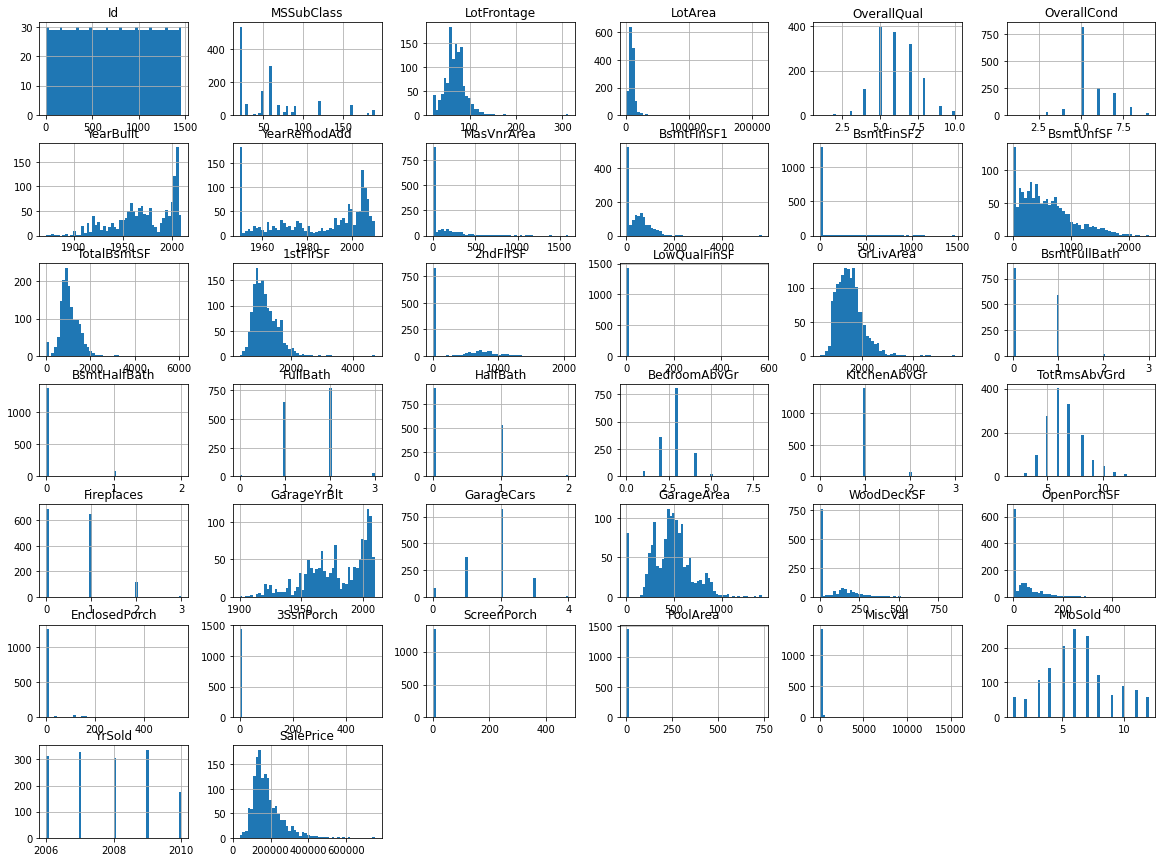

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [129]:
corr_matrix = train_data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

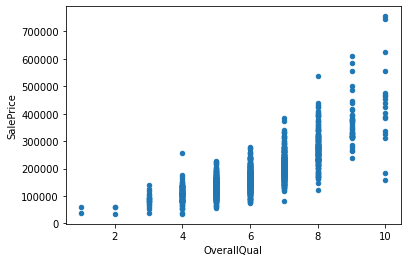

In [134]:
train.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=1.0)

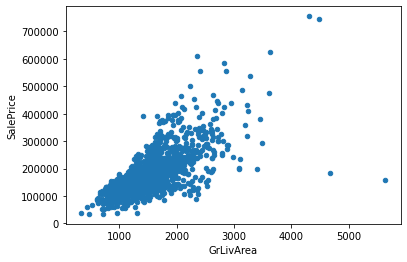

In [135]:
train.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=1.0)


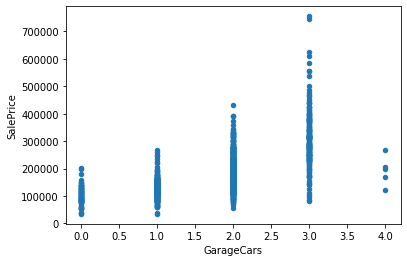

In [136]:
train.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=1.0)

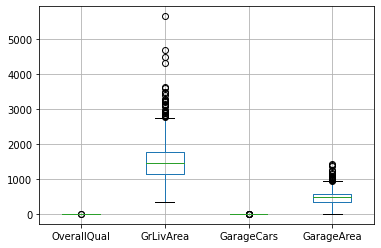

In [137]:
train.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])

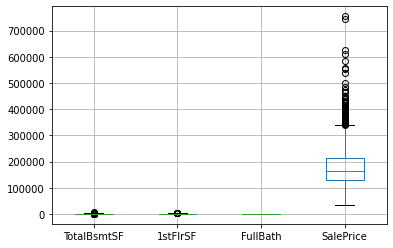

In [139]:
train.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])

In [142]:
train.fillna(train.mean(), inplace = True)
test.fillna(test.mean(), inplace = True)
print(train.isnull().sum())
print(test.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64
Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64


Encoding data


In [154]:
from sklearn.preprocessing import LabelEncoder
columns = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for col in columns:
    encode = LabelEncoder()
    encode.fit(list(train[col].values))
    train[col] = encode.transform(list(train[col].values))

for col in columns:
    encodetest = LabelEncoder()
    encodetest.fit(list(test[col].values))
    test[col] = encodetest.transform(list(test[col].values))

values1 = train[train.columns[:80]] 
testvalues1 = test[test.columns[:80]]
values2 = train['SalePrice']

In [156]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(values1, values2)
regression.score(values1, values2)
#training regression model

0.8548395143943592

House Sale Price prediction


In [158]:
pred = regression.predict(testvalues1)
pd.DataFrame({'Predicted Price of the House': pred})

,Predicted Price of the House
0,184936.609022
1,239791.092108
2,245071.890618
3,263617.412688
4,263185.252850
...,...
1454,152148.218848
1455,138020.527442
1456,225624.228917
1457,196336.422912
